In [20]:
import tweepy, json, pymongo
import pandas as pd
from utils import *
from analysis import *
from TextAnalysis import *

In [21]:
tweets = loadTweets(collectionName='ballonDOrOriginal',fromDb=True)

In [4]:
#all the keys found in the tweets collection
allKeys = set()
for tweet in tweets:
    allKeys.update(tweet.keys())
    
allKeys

{'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user'}

In [5]:
#removes tweets which contain truncated text from the collected one
tweetsToRm = []
for tweet in tweets:
    if tweet['truncated']:
        tweetsToRm.append(tweet)

for tweet in tweetsToRm:
    tweets.remove(tweet)
   # print (tweets[tweet]['retweeted_status'])
len(tweets)

6431

In [7]:
#REMOVES ALL THE USELESS FEATURES OF THE TWEETS(SUCH AS ID, ETC.)

attrToRemove = ['id','id_str','in_reply_to_screen_name','in_reply_to_status_id_str','in_reply_to_user_id',
            'in_reply_to_user_id_str','quoted_status_id_str','favorited','retweeted','possibly_sensitive',
            'filter_level','timestamp_ms','truncated','quoted_status_id', 'created_at', 'extended_entities',
               'in_reply_to_status_id']

ballondorTweetsUpdated = []

for tweet in tweets:
    #removes tweets which contain truncated text from the collected one
    if not tweet['truncated']:
        #REMOVES ALL THE USELESS FEATURES OF A TWEET(SUCH AS ID, ETC.)
        ballondorTweetsUpdated.append({a : tweet[a] for a in tweet if a not in attrToRemove})
       
        #list(map(tweet.__delitem__, filter(tweet.__contains__,attrToRemove)))
    

    

In [8]:
tweetsDf = pd.DataFrame(ballondorTweetsUpdated)

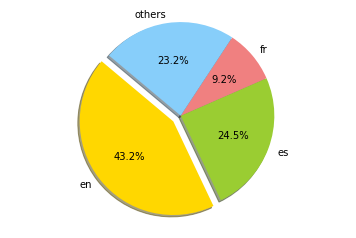

In [9]:
langs = tweetsDf['lang'].value_counts()
frstLangs = langs[:3]
othersLangs = langs[3:]
tags = list(frstLangs.index)
tags.append("others")
tags

values = list(i for i in frstLangs)
values.append(sum(list(i for i in othersLangs)))
#values.append(sum(list(othersLangs.get(i) for i in othersLangs)))
values

import matplotlib.pyplot as plt

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(values, explode=explode, labels=tags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


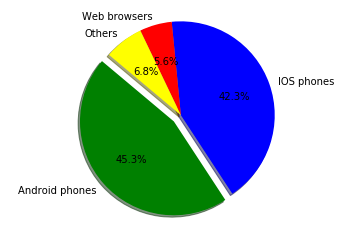

In [10]:
langs = tweetsDf['source'].value_counts()
frstLangs = langs[:3]
othersLangs = langs[3:]
tags = ['Android phones', 'IOS phones','Web browsers', 'Others']
tags

values = list(i for i in frstLangs)
values.append(sum(list(i for i in othersLangs)))
#values.append(sum(list(othersLangs.get(i) for i in othersLangs)))
values

import matplotlib.pyplot as plt

colors = ['green', 'blue', 'red', 'yellow']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(values, explode=explode, labels=tags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [11]:
getPercentValues(df=tweetsDf,attributeName='lang')

lang
en     43.165915
es     24.506298
fr      9.174312
ar      8.365729
it      5.426839
und     2.907790
pt      2.674545
in      2.037008
ja      0.808583
th      0.310994
hi      0.202146
pl      0.077748
tr      0.077748
fi      0.046649
ht      0.046649
de      0.031099
ru      0.015550
ta      0.015550
uk      0.015550
nl      0.015550
fa      0.015550
tl      0.015550
no      0.015550
cy      0.015550
sl      0.015550
dtype: float64

In [12]:
getNofNull(tweetsDf,'retweeted_status')
getPercentValues(tweetsDf,'source')

source
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     45.342870
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       42.326232
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                        5.551236
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                                      2.534598
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                         1.632717
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                                   0.342093
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                       0.342093
<a href="http://www.oscrape.com" rel="nofollow">Oscrape AutoBot</a>                                       0.326543
<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows</a>  

In [13]:
getPercentValues(tweetsDf,'reply_count')

reply_count
0    100.0
dtype: float64

In [14]:
for attribute in ['source','is_quote_status','quote_count','reply_count','retweet_count','favorite_count']:
    print (tweetsDf[attribute].value_counts())

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     2916
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       2722
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                        357
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                                      163
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                         105
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                        22
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                                    22
<a href="http://www.oscrape.com" rel="nofollow">Oscrape AutoBot</a>                                        21
<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>                                  10
<a href="h

In [17]:
def getDicValues(attribute, attributeToCount, subAttr=""):
    tmp2 = tweetsDf[attribute]
    counts = {}
    for tweet in tmp2:
        try:
            value=tweet[attributeToCount]
            if value in counts:
                counts[value]+=1
            else:
                counts[value]=1
        except TypeError:
            pass
    
    return [(k, counts[k]) for k in sorted(counts, key=counts.get, reverse=True)]

getDicValues('retweeted_status','id')
#getDicValues('entities',"hashtags['text']")


[(938846446354300928, 342),
 (938936483037167617, 311),
 (938850776012787712, 241),
 (938847251052597249, 176),
 (938909014792048640, 161),
 (938864714028896256, 140),
 (938846492474961920, 134),
 (938870555482128385, 109),
 (938847585120473089, 108),
 (938846074474717184, 94),
 (938849053496041472, 86),
 (938876013588729856, 85),
 (938849279887794184, 74),
 (938851398397124614, 69),
 (938845958774972416, 69),
 (938847238716928000, 69),
 (938846711740551168, 68),
 (938873154172280832, 58),
 (938849237097267200, 58),
 (938868995574427648, 57),
 (938847082668011520, 53),
 (938861156332077056, 51),
 (938927683970502657, 51),
 (938866959248232449, 46),
 (938845966005866497, 43),
 (938846290452144128, 41),
 (938846265911271424, 41),
 (938847694256246785, 41),
 (938847713420038145, 41),
 (938879494399676416, 39),
 (938941281451077632, 38),
 (938940820954038272, 37),
 (938872367228612614, 35),
 (938925857468567554, 34),
 (938927201893875720, 32),
 (938847987035443201, 31),
 (93886367207981056

In [15]:
texts = [tweet['text'] for tweet in tweets]
#cleanedTexts = [text_clean(text) for text in texts]
cleanedTexts = list(map(lambda x: text_clean(x),texts))
if tweetsDf is None:
    tweetsDf = pd.DataFrame()
tweetsDf['clean_text'] = cleanedTexts
features = list(map(lambda x: text_preprocess(x), cleanedTexts))

In [16]:
features

[{'emoticons': ['⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽'],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('laligaen', 'n', 'laligaen', 'laligaen'),
   ('two', 'n', 'two', 'two'),
   ('legends', 'n', 'legend', 'legend'),
   ('10', 'a', '10', '10'),
   ('ballondor', 'a', 'ballondor', 'ballondor'),
   ('cristiano', 'n', 'cristiano', 'cristiano'),
   ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
   ('messi', 'n', 'messi', 'messi'),
   ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
   ('laliga', 'n', 'laliga', 'laliga')]},
 {'emoticons': ['🏆', '🎉', '🎇', '👏'],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('championsleague', 'n', 'championsleagu', 'championsleague'),
   ('winner', 'n', 'winner', 'winner'),
   ('ballondor', 'n', 'ballondor', 'ballondor'),
   ('ronaldo', 'n', 'ronaldo', 'ronaldo'),
   ('congratulations', 'n', 'congratul', 'congratulation'),
   ('cristiano', 'n', 'cristiano', 'cristiano')]},
 {'emoticons': [],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('marca', 'n', 'marca', 'ma

In [17]:
bow = getBow(features, asBoolean=True)
bow['origWords']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [18]:
getTopNWords(bow,n=15)

[('rt', 5997),
 ('ballondor', 4228),
 ('cristiano', 3081),
 ('🏆', 1868),
 ('ronaldo', 1594),
 ('messi', 1480),
 ('de', 1082),
 ('…', 974),
 ('2017', 944),
 ('congratulations', 871),
 ('championsleague', 736),
 ('oro', 646),
 ('2008', 612),
 ('ballon', 601),
 ('👏', 560)]

In [19]:
counts = {}
for tweet in tweetsDf['entities']:
    hashtags = tweet['hashtags']
    for hashtag in hashtags:
        text = hashtag['text'].lower()
        if text in counts:
            counts[text]+=1
        else:
            counts[text]=1
    hashTagCounts = [(k, counts[k]) for k in sorted(counts, key=counts.get, reverse=True)]

hashTagCounts
#tweetsDf.iloc[0]['entities']['hashtags']

[('ballondor', 4233),
 ('ballondor2017', 268),
 ('cr7', 186),
 ('idol', 141),
 ('em21', 140),
 ('thebest', 110),
 ('teamoftheyear', 92),
 ('eiffeltower', 74),
 ('cristianoronaldo', 71),
 ('messi', 68),
 ('ronaldo', 57),
 ('laliga', 42),
 ('laportada', 24),
 ('toureiffel', 21),
 ('lomásvisto', 19),
 ('balondeoro', 18),
 ('jumatberkah', 17),
 ('elshintanews', 17),
 ('cristiano', 16),
 ('cri5tiano', 14),
 ('elchiringuitodemega', 13),
 ('lomásviral', 12),
 ('balondeoro2017', 12),
 ('cr5', 12),
 ('الكرة_الذهبية', 11),
 ('g1g1', 10),
 ('halamadrid', 10),
 ('portugal', 10),
 ('allezparis', 10),
 ('lomáscomentado', 10),
 ('mufc', 9),
 ('psg', 9),
 ('infobola', 8),
 ('semuanyabola', 8),
 ('كريستيانو_رونالدو', 7),
 ('cr7era', 7),
 ('jamasvotariaporrosales', 6),
 ('trafficrequestwithosi', 6),
 ('afp', 5),
 ('football', 5),
 ('balóndeoro', 5),
 ('بوفون', 5),
 ('bbcqt', 5),
 ('jerusalem', 5),
 ('elclasico', 5),
 ('chiringuitocristiano', 4),
 ('benzema', 4),
 ('rmfamily', 4),
 ('goat', 4),
 ('forçab

In [20]:
features[0]['words']

[('rt', 'n', 'rt', 'rt'),
 ('laligaen', 'n', 'laligaen', 'laligaen'),
 ('two', 'n', 'two', 'two'),
 ('legends', 'n', 'legend', 'legend'),
 ('10', 'a', '10', '10'),
 ('ballondor', 'a', 'ballondor', 'ballondor'),
 ('cristiano', 'n', 'cristiano', 'cristiano'),
 ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
 ('messi', 'n', 'messi', 'messi'),
 ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
 ('laliga', 'n', 'laliga', 'laliga')]